In [182]:
import warnings
import random
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import sklearn.model_selection
from sklearn import preprocessing
from prettytable import PrettyTable
%matplotlib inline

In [169]:
X = load_boston().data
Y = load_boston().target
X=np.array(X)
Y=np.array(Y)

In [170]:
Xf = load_boston().data
Yf= load_boston().target
scaler = preprocessing.StandardScaler().fit(Xf)
Xf = scaler.transform(Xf)
clf = SGDRegressor()
clf.fit(Xf, Yf)
MSE_Sk=mean_squared_error(Y, clf.predict(Xf))
print(MSE_Sk)

21.98663763243149


### Obtaining Weight vectors of SKlearn SGD regressor model

In [171]:
sklearn_sgd_w=clf.coef_

In [172]:
print(sklearn_sgd_w)

[-0.8361677   0.94633492 -0.13073945  0.72560915 -1.8579223   2.76270848
 -0.03741179 -2.99612995  1.92989414 -1.30083627 -2.00072554  0.85300106
 -3.68146653]


# CUSTOM IMPLEMENTATION

In [173]:
X = load_boston().data
Y = load_boston().target
X=np.array(X)
Y=np.array(Y)

In [174]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [175]:
from sklearn.metrics import mean_squared_error

wj,bj,r,n=np.zeros(shape=(1,13)),0,0.01,len(X)

for i in range(1000):
    
    w0,b0,wi,bi=Wj,Bj,np.zeros(shape=(1,13)),0
    x,y = X,Y
    
    for i in range(n):
        
        wi+=(-2)*x[i]*(y[i]-(np.dot(w0,x[i])+b0))
        bi+=(-2)*(y[i]-(np.dot(w0,x[i])+b0))

    wj=(w0-r*(wi)/n)
    
    bj=(b0-r*(bi)/n)


Ypred_myown=list()

# calculting y using obtained or updated w 

for i in range(len(X)):
    Y_m=np.dot(wj,X[i])+bj
    Ypred_myown.append((Y_m))
    
MSE_custom=mean_squared_error(Y,Ypred_myown)
print('MEAN SQUARED ERROR =',MSE_custom)

MEAN SQUARED ERROR = 21.953636814469494


### Scatter plot of Actual vs Predicted values of SGD regressor  

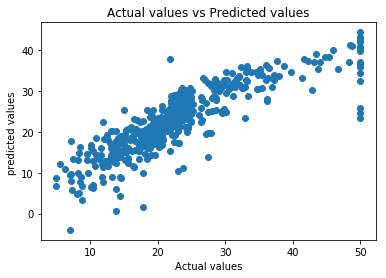

In [176]:
plt.scatter(Y, clf.predict(Xf))
plt.xlabel('Actual values')
plt.ylabel('predicted values ')
plt.title('Actual values vs Predicted values')
plt.show()

### Scatter plot of Actual vs Predicted values of custom implementation

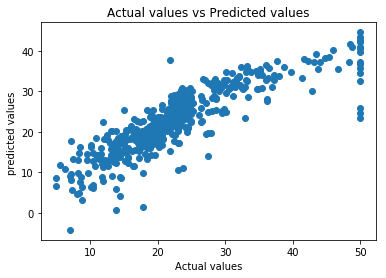

In [177]:
plt.scatter(Y,Ypred_myown)
plt.xlabel('Actual values')
plt.ylabel('predicted values ')
plt.title('Actual values vs Predicted values')
plt.show()

In [181]:
print("Weights obtained using SK-learn SGD")
print("===================================")
print(sklearn_sgd_w)
print("\n")
print("weights obtained using custom implementation")
print("============================================")
print(wj)

Weights obtained using SK-learn SGD
[-0.8361677   0.94633492 -0.13073945  0.72560915 -1.8579223   2.76270848
 -0.03741179 -2.99612995  1.92989414 -1.30083627 -2.00072554  0.85300106
 -3.68146653]


weights obtained using custom implementation
[[-0.87263326  0.9854821  -0.0938077   0.71493548 -1.9393904   2.73713176
  -0.02832074 -3.05588889  2.05100218 -1.4140035  -2.02469224  0.85002164
  -3.71549063]]


In [183]:
x = PrettyTable()
x.field_names = ["type of SGD implementation","MSE"]
x.add_row(["Sk-learn",MSE_Sk])
x.add_row(["Custom Implementation",MSE_custom])
print(x)

+----------------------------+--------------------+
| type of SGD implementation |        MSE         |
+----------------------------+--------------------+
|          Sk-learn          | 21.98663763243149  |
|   Custom Implementation    | 21.953636814469494 |
+----------------------------+--------------------+
